从三个方面评价医疗卫生资源的配置：
1. 人力
    - 卫生技术人员数
    - 执业（助理）医师人员数
    - 注册护士数
2. 物力
    - 卫生机构床位数
    - 医疗卫生机构数
3. 财力
    - 财政支出中卫生经费（万元）

针对每个指标，从两个方面进行比较：
1. 总体的统计量
2. 时间变化趋势

针对每个省份，\
标准化处理与综合得分
目的：为了在不同指标之间进行合理比较，可以将数据进行标准化处理（如 Z-score 或 Min-Max 标准化），并计算各地区的综合得分。
方法：对每个地区的各项指标进行标准化，然后对标准化后的数据进行加权求和（可以根据政策或研究重点分配不同的权重），得到各地区的医疗资源综合得分。
可视化：绘制热力图或雷达图，展示各地区的综合得分情况和各项指标的相对位置。

In [1]:
# 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 导入所有指标数据
personnels = pd.read_csv("./data/index/personnels.csv")
professors = pd.read_csv("./data/index/professors.csv")
nurse = pd.read_csv("./data/index/nurse.csv")
beds = pd.read_csv("./data/index/beds.csv")
organizations = pd.read_csv("./data/index/organizations.csv") 
fee = pd.read_csv("./data/index/fee.csv")

In [7]:
print(personnels.info())
print(professors.info())
print(nurse.info())
print(beds.info())
print(organizations.info())
print(fee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年份      34 non-null     int64  
 1   中国      34 non-null     float64
 2   北京市     34 non-null     float64
 3   天津市     34 non-null     float64
 4   河北省     34 non-null     float64
 5   山西省     34 non-null     float64
 6   内蒙古     34 non-null     float64
 7   辽宁省     34 non-null     float64
 8   吉林省     34 non-null     float64
 9   黑龙江     34 non-null     float64
 10  上海市     34 non-null     float64
 11  江苏省     34 non-null     float64
 12  浙江省     34 non-null     float64
 13  安徽省     34 non-null     float64
 14  福建省     34 non-null     float64
 15  江西省     34 non-null     float64
 16  山东省     34 non-null     float64
 17  河南省     34 non-null     float64
 18  湖北省     34 non-null     float64
 19  湖南省     34 non-null     float64
 20  广东省     34 non-null     float64
 21  广西      34 non-null     float64
 22  海南省 

In [3]:
# 年均增长率函数（CAGR）
def calculate_cagr(start, end, periods):
    return (end / start) ** (1 / periods) - 1

In [4]:
# 箱线图绘制函数
def plot_boxplot(df, xlabel):
    df = df.drop(columns=['年份', '中国'])

    # 按照中位数从高到低排列
    median_sorted = df.median().sort_values(ascending=False)
    df_sorted = df[median_sorted.index]

    # 转化成长格式
    df_melted = df_sorted.melt(var_name='省市', value_name=xlabel)

    # 绘制箱线图
    sns.set_theme(style="ticks")
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 设置负号显示
    fig, ax = plt.subplots(figsize=(8, 16))
    sns.boxplot(x=xlabel, y='省市', data=df_melted, orient='h', hue="省市")
    plt.xlabel(xlabel)
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    plt.show()

In [5]:
# 计算各地区年均增长率函数
def calculate_regions_cagr(df):
    regions = df.columns[2:]  # 排除年份和中国列
    growth_rates = {}

    for region in regions:
        start_value = df[region].iloc[0]
        end_value = df[region].iloc[-1]
        periods = df['年份'].iloc[-1] - df['年份'].iloc[0]
        growth_rate = calculate_cagr(start_value, end_value, periods)
        growth_rates[region] = growth_rate * 100

    return growth_rates

In [9]:
# 年均增长率柱状图函数
def plot_bar_chart(df, xlabel):
    # 计算各地区的年均增长率
    growth_rates = calculate_regions_cagr(df)

    # 将增长率字典封装成dataframe
    growth_rate_df = pd.DataFrame(list(growth_rates.items()), columns=["地区", xlabel])
    growth_rate_df.sort_values(by=xlabel, ascending=False, inplace=True)

    # 绘制柱状图比较各地区的年均增长率
    sns.set_theme(style="darkgrid")

    plt.figure(figsize=(14, 8))
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 设置负号显示
    sns.barplot(x=xlabel, y="地区", data=growth_rate_df, palette="viridis")
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel("")
    plt.show()

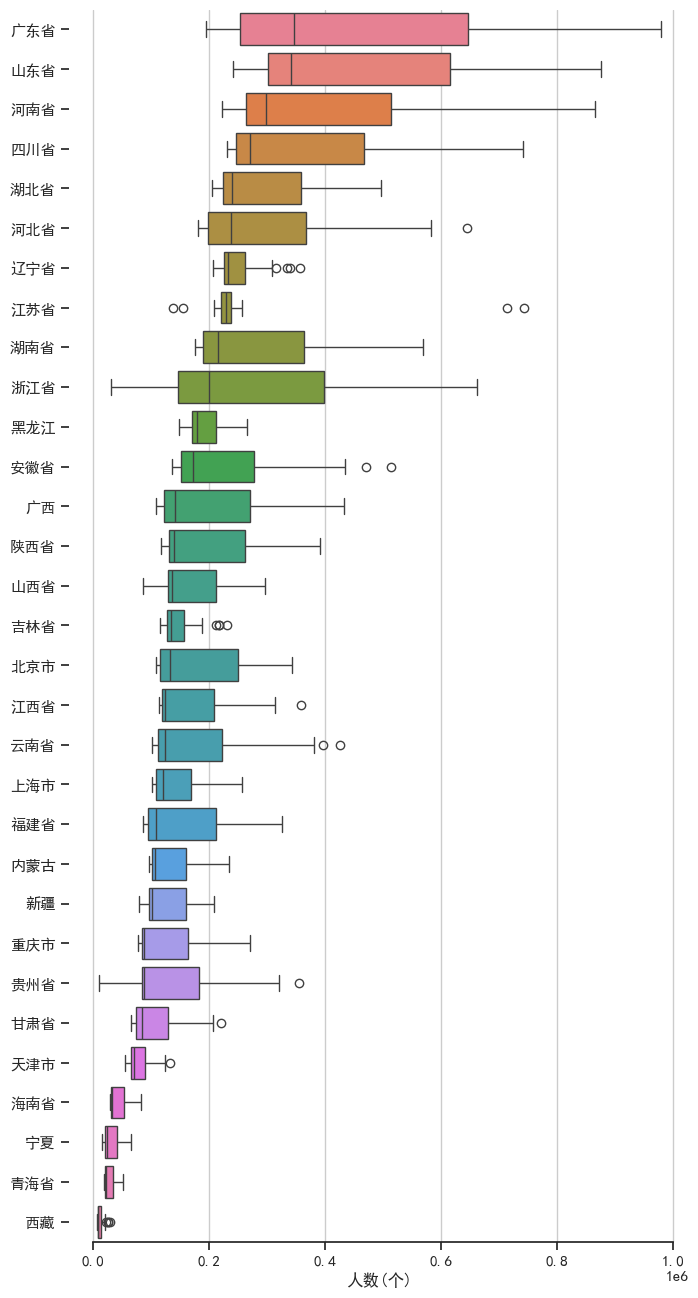

In [7]:
# 卫生技术人员数箱线图
plot_boxplot(personnels, '人数(个)')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19900\3033537508.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xlabel, y="地区", data=growth_rate_df, palette="viridis")


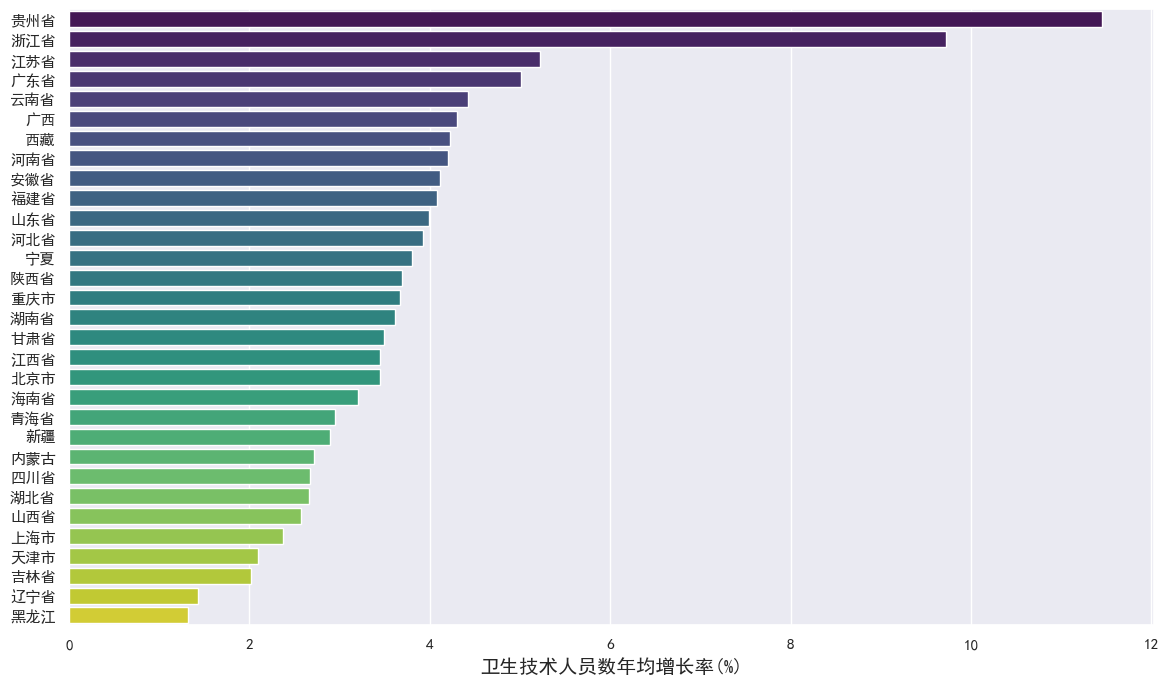

In [10]:
plot_bar_chart(personnels, "卫生技术人员数年均增长率(%)")

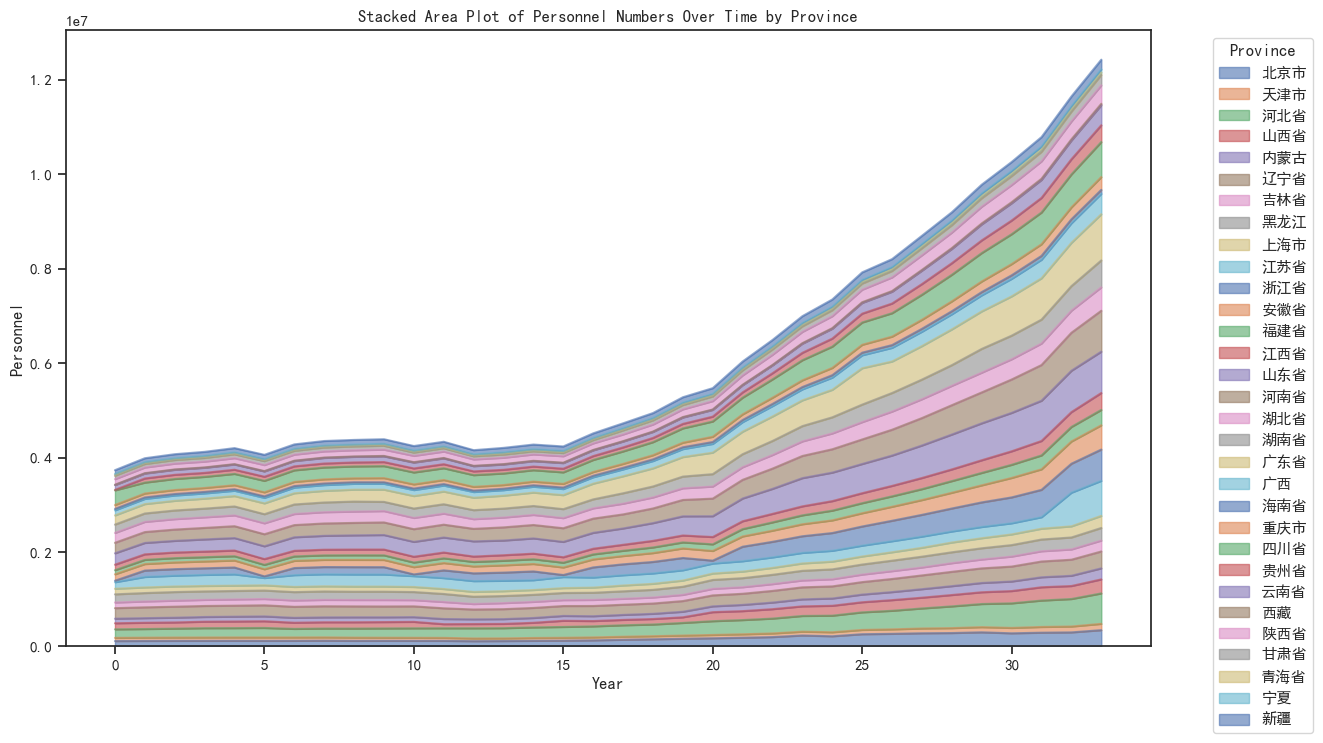

In [21]:
# 绘制区域图
personnels.plot.area(figsize=(14, 8), alpha=0.6)

# 调整图形
plt.title('Stacked Area Plot of Personnel Numbers Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Personnel')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()